## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
beverages = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
beverages.drop('total_litres_of_pure_alcohol', axis=1, inplace=True)
#beverages
bev_t = beverages.melt(id_vars = ['country'], var_name="drink", value_name="servings")
bev_t



,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

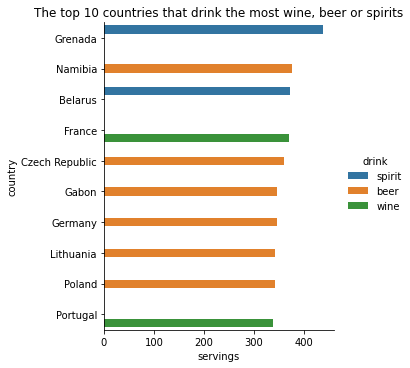

In [6]:
bev_t['drink'] = bev_t['drink'].apply(lambda x: x.replace('_servings', ''))
top = bev_t.sort_values(by='servings', ascending=False)
sns.catplot(
    data=top.head(10),
    y="country",
    x="servings",
    hue="drink",
    kind="bar"
)
plt.title("The top 10 countries that drink the most wine, beer or spirits");

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [7]:
pd.pivot_table(bev_t, values='servings', columns='drink')

drink,beer,spirit,wine
servings,106.160622,80.994819,49.450777
